# First mini project - Meteorological Data

For my first mini project, I have chosen Openweather API (https://openweathermap.org/api) where I have accessed essential weather data for 500 random cities on given day and time.
Data is further analysed and compared.

Units are as following: Temperature in °C, Pressure in hPa, WindSpeed in m/s and Humidity is showed in percentage. 
Country IDs are as following: https://www.iban.com/country-codes. 

I wanted to analyse general weather conditions of the day and find some of the min/max values in different categories. Data can potenntially be used further for prediciting models.

In [264]:
#Loading libraries that will be used

import requests
import json

import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #(Pip install)

%matplotlib inline

### Trial API call

In [2]:
API_key = '4c7690aee7f3cf8b20d03b5086768b35'

#API key requested from OpenWeather API

In [3]:
url = f'https://api.openweathermap.org/data/2.5/weather?lat=-36.84&lon=174.76&appid={API_key}&units=metric'

#trial API call using latitude and logitude (for Auckland) and specifying units as metric

    
r = requests.get(url)

r.json() 

{'coord': {'lon': 174.76, 'lat': -36.84},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 19.42,
  'feels_like': 19.04,
  'temp_min': 17.63,
  'temp_max': 20.25,
  'pressure': 1007,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 9.77, 'deg': 260},
 'clouds': {'all': 75},
 'dt': 1669338341,
 'sys': {'type': 2,
  'id': 2012285,
  'country': 'NZ',
  'sunrise': 1669309065,
  'sunset': 1669360688},
 'timezone': 46800,
 'id': 2193734,
 'name': 'Auckland',
 'cod': 200}

###### I have used trial call, along with documentation to iterate over json file and extract columns I need.  

## Loading the data

On OpenWeather API documentation it is written to access list of cities as downloadable json file which I then loaded. 

In [14]:
file = open(r'/Users/martahuhoja/Documents/IOD/city.list.min.json')

city = json.load(file)

In [134]:
city 

[{'id': 833,
  'name': 'Ḩeşār-e Sefīd',
  'state': '',
  'country': 'IR',
  'coord': {'lon': 47.159401, 'lat': 34.330502}},
 {'id': 2960,
  'name': '‘Ayn Ḩalāqīm',
  'state': '',
  'country': 'SY',
  'coord': {'lon': 36.321911, 'lat': 34.940079}},
 {'id': 3245,
  'name': 'Taglag',
  'state': '',
  'country': 'IR',
  'coord': {'lon': 44.98333, 'lat': 38.450001}},
 {'id': 3530,
  'name': 'Qabāghlū',
  'state': '',
  'country': 'IR',
  'coord': {'lon': 46.168499, 'lat': 36.173302}},
 {'id': 5174,
  'name': '‘Arīqah',
  'state': '',
  'country': 'SY',
  'coord': {'lon': 36.48336, 'lat': 32.889809}},
 {'id': 7264,
  'name': 'Kalāteh-ye Dowlat',
  'state': '',
  'country': 'IR',
  'coord': {'lon': 57.616982, 'lat': 36.163841}},
 {'id': 8084,
  'name': 'Behjatābād',
  'state': '',
  'country': 'IR',
  'coord': {'lon': 51.461639, 'lat': 36.667431}},
 {'id': 9874,
  'name': 'Ţālesh Maḩalleh',
  'state': '',
  'country': 'IR',
  'coord': {'lon': 50.679192, 'lat': 36.894329}},
 {'id': 11263,
  'n

As original list has over 20 000 cities, I iterated over the list and selected 500 random cities to be included in my API call.  Values were accessed for November 24 at 2 pm (NZST).

In [15]:
cities = [i['id'] for i in city]

In [16]:
cities = random.sample(cities, 500) 

In [17]:
#creating empty list

Cities = []
temp = []
humidity = []
pressure = []
weather = []
description = []
windspeed = []
country = []
longitude = []
latitude = []


#creating for loop that will iterate over list of 500 cities 
for cityID in cities:
    url = f'https://api.openweathermap.org/data/2.5/weather?id={cityID}&appid={API_key}&units=metric'
    #url to access weather data in particular city (using city ID); units set to metric

    c = requests.get(url)

    data = c.json()
    


    #appending data to empty list; specifying dictionary key
    Cities.append(data['name'])
    temp.append(data['main']['temp'])
    humidity.append(data['main']['humidity'])
    pressure.append(data['main']['pressure'])
    weather.append(data['weather'][0]['main'])
    description.append(data['weather'][0]['description'])
    windspeed.append(data['wind']['speed'])
    country.append(data['sys']['country'])
    longitude.append(data['coord']['lon'])
    latitude.append(data['coord']['lat'])
        

#Loading data into dataframe and giving names to columns
cities_weather_df  = pd.DataFrame()
cities_weather_df['Names'] = Cities
cities_weather_df['Temperature'] = temp
cities_weather_df['Humidity'] = humidity
cities_weather_df['Pressure'] = pressure
cities_weather_df['Weather'] = weather
cities_weather_df['Description'] = description
cities_weather_df['WindSpeed'] = windspeed
cities_weather_df['Country'] = country
cities_weather_df['Longitude'] = longitude
cities_weather_df['Latitude'] = latitude


cities_weather_df 

,Names,Temperature,Humidity,Pressure,Weather,Description,WindSpeed,Country,Longitude,Latitude
0,Sarno,9.73,94,1016,Clear,clear sky,1.19,IT,14.6198,40.8108
1,Wasserliesch,6.74,93,1014,Clouds,broken clouds,2.34,DE,6.5500,49.7167
2,Surry Hills,24.78,63,1016,Clear,clear sky,7.20,AU,151.2128,-33.8837
3,Simaqiao,15.84,97,1019,Clouds,overcast clouds,0.86,CN,111.7611,25.4161
4,Fairwood,7.59,78,1022,Clear,clear sky,2.57,US,-122.1573,47.4484
...,...,...,...,...,...,...,...,...,...,...
495,Montluçon,10.39,86,1014,Clouds,overcast clouds,1.79,FR,2.6000,46.3333
496,Shanmuqiao,18.73,69,1018,Clouds,scattered clouds,0.68,CN,110.9322,29.5381
497,Hardt,0.21,85,1018,Clouds,overcast clouds,2.35,DE,8.4167,48.1833
498,Saranpaul',-23.07,99,1035,Clouds,scattered clouds,1.12,RU,60.9167,64.2667


### Describing dataframe

In [18]:
cities_weather_df.head(10) #first 10 rows

,Names,Temperature,Humidity,Pressure,Weather,Description,WindSpeed,Country,Longitude,Latitude
0,Sarno,9.73,94,1016,Clear,clear sky,1.19,IT,14.6198,40.8108
1,Wasserliesch,6.74,93,1014,Clouds,broken clouds,2.34,DE,6.5500,49.7167
2,Surry Hills,24.78,63,1016,Clear,clear sky,7.20,AU,151.2128,-33.8837
3,Simaqiao,15.84,97,1019,Clouds,overcast clouds,0.86,CN,111.7611,25.4161
4,Fairwood,7.59,78,1022,Clear,clear sky,2.57,US,-122.1573,47.4484
5,Metricup,17.38,74,1013,Clouds,broken clouds,3.52,AU,115.1167,-33.7833
6,South Banat,2.97,93,1018,Clouds,overcast clouds,3.48,RS,20.9658,45.0808
7,Baie-Mahault,24.94,83,1014,Clouds,scattered clouds,1.03,GP,-61.5833,16.2667
8,Pasciana,5.37,100,1019,Mist,mist,1.54,IT,12.6833,42.9667
9,Rājākhera,14.59,34,1017,Clear,clear sky,0.73,IN,78.1714,26.8961


In [19]:
cities_weather_df.tail(10) #last 10 rows

,Names,Temperature,Humidity,Pressure,Weather,Description,WindSpeed,Country,Longitude,Latitude
490,Xiaolukou,18.26,74,1018,Clouds,broken clouds,0.56,CN,117.6077,29.8615
491,Aībak,8.88,33,1020,Clouds,broken clouds,1.07,AF,68.0155,36.2647
492,Hornillos de Cerrato,8.94,97,1021,Clouds,scattered clouds,2.85,ES,-4.2721,41.9877
493,Rimsberg,3.49,93,1015,Clouds,broken clouds,1.84,DE,7.2167,49.6500
494,Alsterberg,3.61,99,1013,Fog,fog,2.57,DE,10.0000,53.6167
495,Montluçon,10.39,86,1014,Clouds,overcast clouds,1.79,FR,2.6000,46.3333
496,Shanmuqiao,18.73,69,1018,Clouds,scattered clouds,0.68,CN,110.9322,29.5381
497,Hardt,0.21,85,1018,Clouds,overcast clouds,2.35,DE,8.4167,48.1833
498,Saranpaul',-23.07,99,1035,Clouds,scattered clouds,1.12,RU,60.9167,64.2667
499,Sörth,4.56,97,1014,Clouds,overcast clouds,2.13,DE,7.6833,50.7000


In [20]:
cities_weather_df.shape 

(500, 10)

In [22]:
cities_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        500 non-null    object 
 1   Temperature  500 non-null    float64
 2   Humidity     500 non-null    int64  
 3   Pressure     500 non-null    int64  
 4   Weather      500 non-null    object 
 5   Description  500 non-null    object 
 6   WindSpeed    500 non-null    float64
 7   Country      500 non-null    object 
 8   Longitude    500 non-null    float64
 9   Latitude     500 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 39.2+ KB


In [188]:
cities_weather_df.columns

Index(['Names', 'Temperature', 'Humidity', 'Pressure', 'Weather',
       'Description', 'Windspeed', 'Country', 'Longitude', 'Latitude'],
      dtype='object')

In [189]:
cities_weather_df.isnull().sum() #checking for null values

Names          0
Temperature    0
Humidity       0
Pressure       0
Weather        0
Description    0
Windspeed      0
Country        0
Longitude      0
Latitude       0
dtype: int64

After initial data analysis, it is clear that dataframe has 500 rows and 10 columns. Column names are: Names, Temperature, Humidity, Pressure, Weather, Description, WindSpeed, Country, Longitude, Latitude. 
There are no missing values in any of the columns. 

In [209]:
cities_weather_df.describe() 

,Temperature,Humidity,Pressure,Windspeed,Longitude,Latitude
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,9.592660,80.042000,1015.79000,2.669120,12.723450,34.572266
std,8.809457,17.889335,5.71272,2.006492,61.700690,23.657637
min,-23.070000,13.000000,981.00000,0.000000,-170.733900,-43.960300
25%,3.800000,74.000000,1013.00000,1.355000,-2.679250,31.400375
50%,7.985000,85.000000,1017.00000,2.115000,8.835650,43.522300
75%,15.035000,93.000000,1019.00000,3.547500,26.995825,48.797450
max,32.920000,100.000000,1035.00000,19.840000,174.616700,65.983300


From general statistics of the whole dataframe, it is visible that difference in temperature is 50 degrees as coldest city has temperature of -23 degrees Celsius and warmest is on 32.92 degrees. Humidity ranges from 13 percent (very low) to 100. There is also a wide range in air pressure from 981 hPa to 1035 hPa. There is city that didn't have any winds at the moment and one where wind was 19.84 m/s.

### Exploring unique countries and  weather conditions values

In [161]:
cities_weather_df['Country'].nunique() #count of unique values in country column

81

In [162]:
cities_weather_df['Country'].unique() #unique values  

array(['IT', 'DE', 'AU', 'CN', 'US', 'RS', 'GP', 'IN', 'RO', 'NL', 'AM',
       'FR', 'RU', 'VE', 'PL', 'ES', 'IE', 'CA', 'BR', 'PK', 'PH', 'TR',
       'ID', 'SE', 'CH', 'GB', 'AD', 'HU', 'TZ', 'LY', 'AT', 'AF', 'JP',
       'PS', 'UA', 'IR', 'ZA', 'AS', 'BE', 'PG', 'BG', 'MX', 'MA', 'AR',
       'MH', 'NZ', 'PT', 'HR', 'CL', 'LU', 'AL', 'TH', 'CO', 'GE', 'CZ',
       'FI', 'IQ', 'KE', 'NO', 'DO', 'GH', 'DZ', 'PE', 'BF', 'TN', 'NG',
       'LB', 'GM', 'GR', 'ME', 'KZ', 'VN', 'GT', 'AO', 'UY', 'EE', 'KR',
       'BO', 'YE', 'DK', 'AZ'], dtype=object)

In [163]:
cities_weather_df['Country'].value_counts() #count of each unique value in country column

DE    54
FR    53
US    47
ES    36
IT    24
      ..
KE     1
NO     1
DO     1
GH     1
LY     1
Name: Country, Length: 81, dtype: int64

There are cities from 81 countries included in random sample. Most common countries are DE (Germany - 54 cities), FR (France - 53 cities) and US (United States of America - 47 countries).

In [135]:
cities_weather_df['Weather'].nunique() #count of unique values in weather column

9

In [30]:
cities_weather_df['Weather'].unique() #unique values

array(['Clear', 'Clouds', 'Mist', 'Rain', 'Snow', 'Dust', 'Haze', 'Fog',
       'Smoke'], dtype=object)

In [31]:
cities_weather_df['Description'].nunique() #count of unique values in description column

13

In [32]:
cities_weather_df['Description'].unique() #unique values

array(['clear sky', 'broken clouds', 'overcast clouds',
       'scattered clouds', 'mist', 'moderate rain', 'light snow',
       'few clouds', 'light rain', 'dust', 'haze', 'fog', 'smoke'],
      dtype=object)

In [141]:
weather = cities_weather_df[['Weather', 'Description']].copy() 
#designing dataframe with weather values and subcategory description
weather

,Weather,Description
0,Clear,clear sky
1,Clouds,broken clouds
2,Clear,clear sky
3,Clouds,overcast clouds
4,Clear,clear sky
...,...,...
495,Clouds,overcast clouds
496,Clouds,scattered clouds
497,Clouds,overcast clouds
498,Clouds,scattered clouds


In [143]:
count = weather['Weather'].value_counts() #total count of weather values

Clouds    349
Clear     109
Rain       25
Mist        7
Snow        4
Haze        2
Fog         2
Dust        1
Smoke       1
Name: Weather, dtype: int64

###### Weather categories and subcategories

In [322]:
df = weather
fig = px.treemap(df, path=['Weather', 'Description']) 
fig.show()

There are 9 unique values in column 'Weather' and 13 in column 'Description'. Weather is telling us about the overall condition and description is more specific but they are subgroup of weather column. We can see that most cities (349 out of 500) were covered by clouds. 

### Exploring correlation

In [210]:
cities_weather_df.corr() 

,Temperature,Humidity,Pressure,Windspeed,Longitude,Latitude
Temperature,1.000000,-0.334930,-0.253866,0.008153,0.220349,-0.748914
Humidity,-0.334930,1.000000,-0.090548,-0.140117,-0.150951,0.425615
Pressure,-0.253866,-0.090548,1.000000,-0.374312,-0.064610,0.050558
Windspeed,0.008153,-0.140117,-0.374312,1.000000,-0.105135,0.027398
Longitude,0.220349,-0.150951,-0.064610,-0.105135,1.000000,-0.262399
Latitude,-0.748914,0.425615,0.050558,0.027398,-0.262399,1.000000


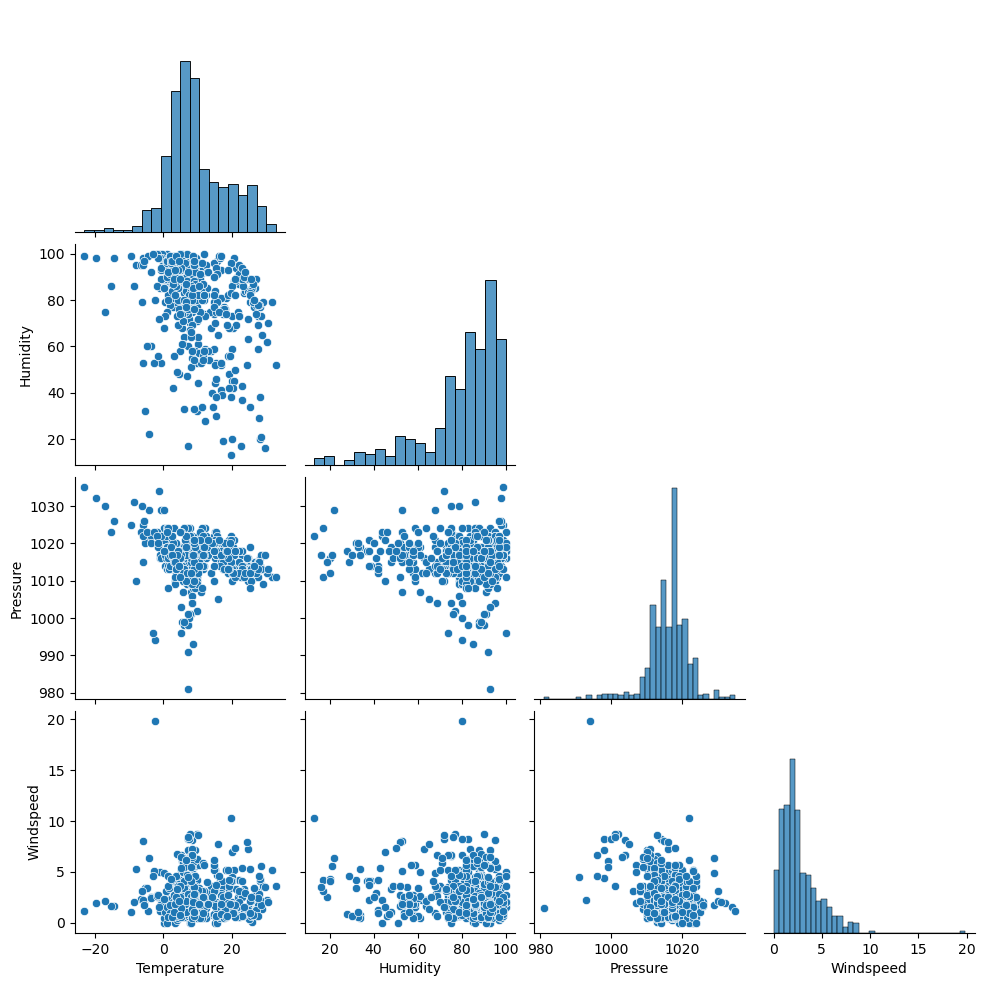

In [193]:
sns.pairplot(data=cities_weather_df.iloc[:, :7], 
             corner = True)
plt.show()

From correlation matrix and pairplots, strongest correlations seem to be negative correlation between temperature and air pressure; temperature and humidity and negative correlation between windspeed and air pressure.

### Describing weather condition in regards to temperature,  wind, air pressure and humidity

Exploring weather conditions in response to other meteorological data. 

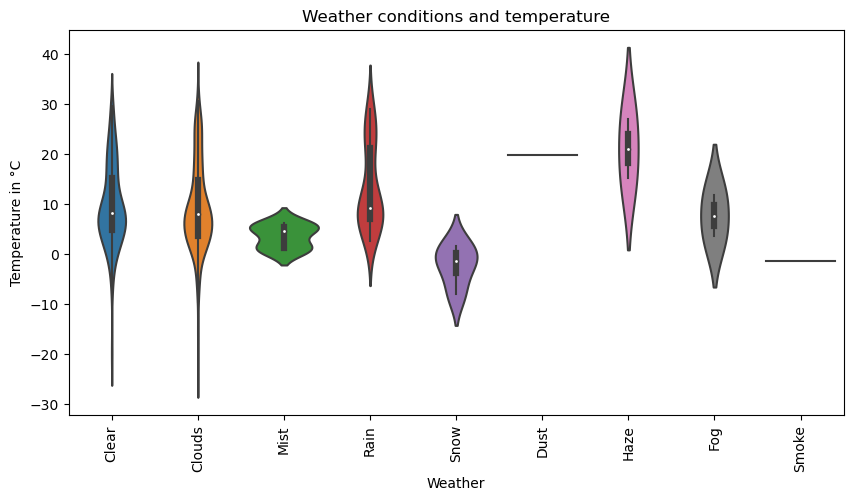

In [305]:
plt.figure(figsize=(10,5))
sns.violinplot (x = cities_weather_df['Weather'], y=cities_weather_df['Temperature'])
plt.xticks(rotation=90) 
plt.title('Weather conditions and temperature')
plt.ylabel ('Temperature in °C')
plt.show()

For dust and smoke there is only one city so it shows exact temperature. Both clouds and clear sky are present from lowest to highest temperatures with most cities being. between 0 and 15 degrees. For snow conditions, most cities are around zero. Haze seem to be present in warmer cities. 

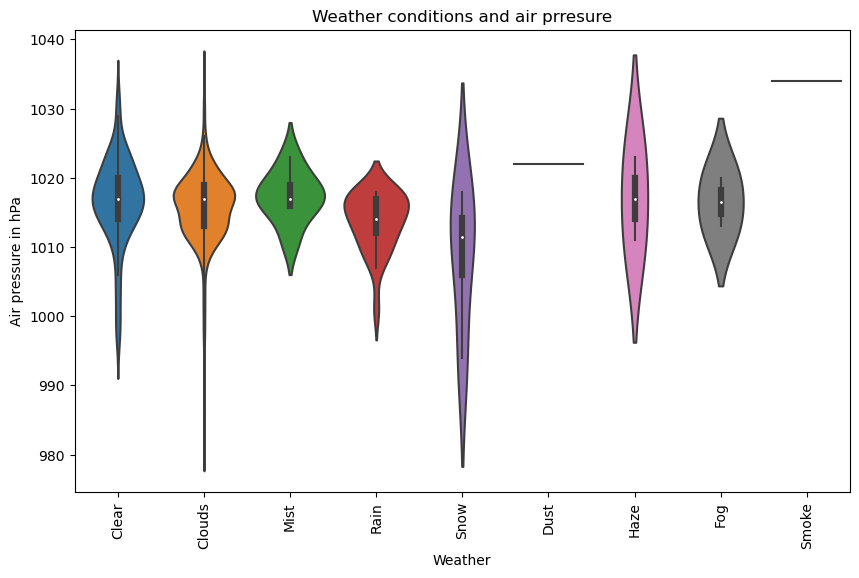

In [323]:
plt.figure(figsize=(10,6))
sns.violinplot (x = cities_weather_df['Weather'], y=cities_weather_df['Pressure'])
plt.xticks(rotation=90) 
plt.title('Weather conditions and air prresure')
plt.ylabel ('Air pressure in hPa')
plt.show()

Cities with clear sky and clouds have more stable air pressure. Air pressure is a bit lower for cities where there is rain and snow again has biggest differences. 

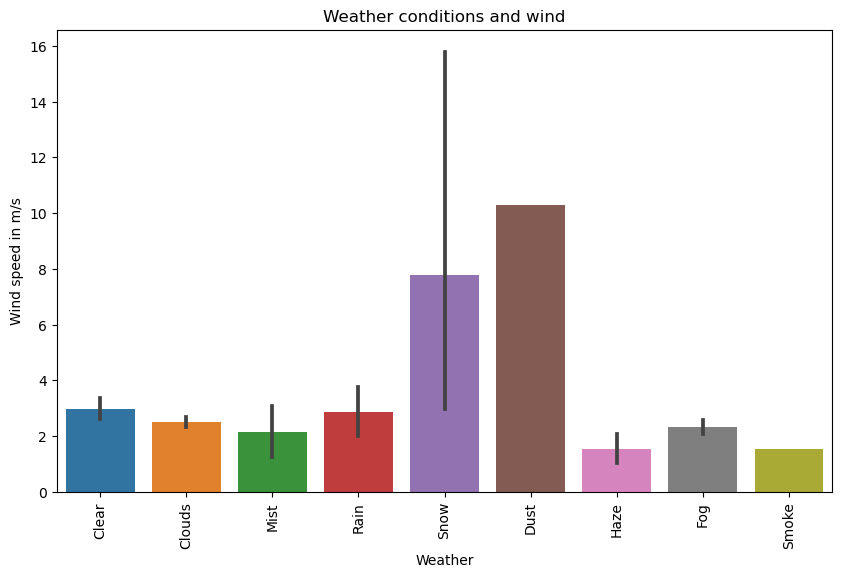

In [332]:
plt.figure(figsize=(10,6))
sns.barplot (x = cities_weather_df['Weather'], y=cities_weather_df['Windspeed'])
plt.xticks(rotation=90) 
plt.title('Weather conditions and wind')
plt.ylabel ('Wind speed in m/s')
plt.show()

Cities where main condition is snow have biggest difference in windspeed between them as there is biggest error bar that shows uncertainity around mean. As snow has second highest estimate and biggest difference, it shows that maybe some of extreme wind values are present for snow conditions. 
Dust is present in single city so it has highest estimate of central tendency. 

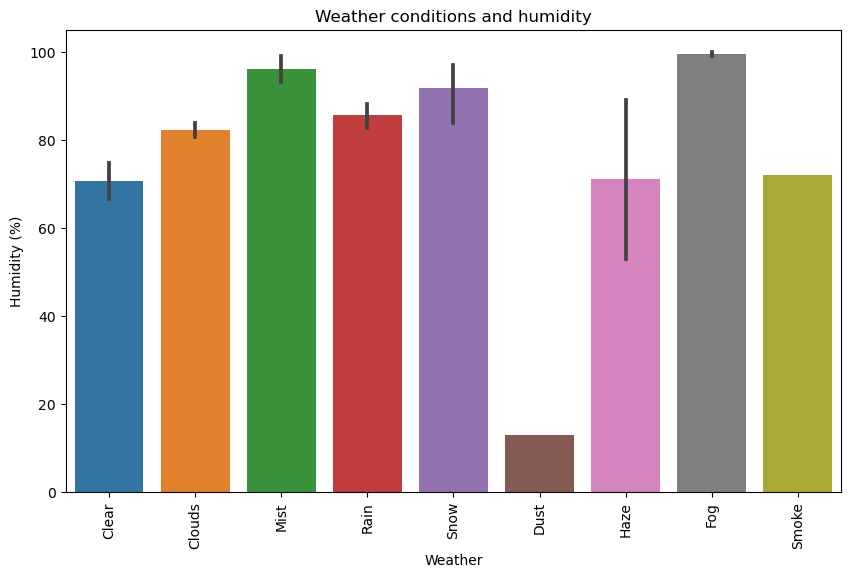

In [330]:
plt.figure(figsize=(10,6))
sns.barplot (x = cities_weather_df['Weather'], y=cities_weather_df['Humidity'])
plt.xticks(rotation=90) 
plt.title('Weather conditions and humidity')
plt.ylabel ('Humidity (%)')
plt.show()

Cities with mist and fog are more humid. Biggest diffrences are in haze conditions. Clear sky has central value around 70% humidity and clouds 80%. For city where there is present fog, humidity reaches 100%. 

Overall, cities in which weather is described as 'clear' or 'clouds' are a bit more stable than those in which weather is described as 'snow'.

### Exploring cities with extreme values

##### Finding cities where temperature is under 0

In [255]:
under_0 = cities_weather_df[cities_weather_df['Temperature']<0].sort_values('Temperature')
#finding temperature to be <0, sorting descending and reseting index in new data frame

under_0

,Names,Temperature,Humidity,Pressure,Weather,Description,Windspeed,Country,Longitude,Latitude
498,Saranpaul',-23.07,99,1035,Clouds,scattered clouds,1.12,RU,60.9167,64.2667
384,Gari,-19.71,98,1032,Clear,clear sky,1.93,RU,62.3497,59.4307
457,Kholzanovo,-17.10,75,1030,Clouds,broken clouds,2.11,RU,107.6667,52.2333
393,Choya,-15.24,86,1023,Clouds,overcast clouds,1.59,RU,86.5467,52.0108
315,Misirevo,-14.46,98,1026,Clouds,broken clouds,1.59,RU,36.7500,56.2667
191,Shalayevo,-9.45,99,1025,Clouds,overcast clouds,1.00,RU,42.7667,56.6833
462,Sosnovyy,-8.53,86,1031,Clouds,overcast clouds,2.06,RU,32.3667,65.9833
17,Novoraychikhinsk,-7.92,95,1010,Snow,light snow,5.27,RU,129.5940,49.7798
214,Uyut,-6.41,95,1023,Clouds,overcast clouds,2.30,RU,50.2876,55.9505
436,Fraser,-6.24,79,1030,Clear,clear sky,3.09,US,-105.8172,39.9450


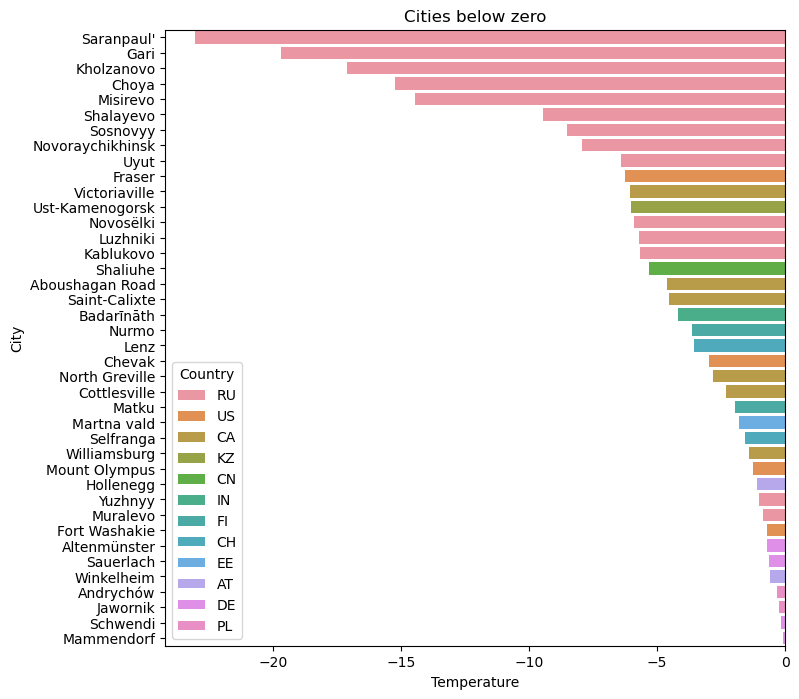

In [256]:
plt.figure(figsize=(8,8))
sns.barplot(data=under_0, x="Temperature", y="Names", hue = 'Country', dodge = False)
#using dodge argument so bars width is not affected after applying hue
plt.title('Cities below zero')
plt.ylabel ('City')
plt.show()

There is 40 cities that were below zero at given time. Most of them are located in Russia. Other countries are USA, Canada, Kazakhstan, China, India, Finland, Switzerland, Estonia, Austria, Germany and Poland.

###### Finding warmest cities

In [257]:
warmest = cities_weather_df.nlargest(40, 'Temperature').sort_values('Temperature', ascending = False)
#choosing 40 warmest cities by choosing largest values out of temperature column

In [258]:
warmest

,Names,Temperature,Humidity,Pressure,Weather,Description,Windspeed,Country,Longitude,Latitude
219,Ifaar,32.92,52,1011,Clouds,few clouds,3.60,ID,140.5167,-2.5667
95,Malaeimi,31.77,79,1011,Clouds,scattered clouds,5.14,AS,-170.7339,-14.3228
385,Samboan,30.68,70,1013,Clouds,scattered clouds,1.99,PH,123.3069,9.5276
98,Dasi,30.23,62,1012,Clouds,broken clouds,2.25,PG,141.3000,-2.7000
363,Wirrabara,29.68,16,1017,Clear,clear sky,3.54,AU,138.2667,-33.0333
116,Marshall Islands,29.00,79,1009,Rain,light rain,3.60,MH,171.2360,7.1130
255,Tanahputih,28.96,65,1013,Clouds,overcast clouds,1.36,ID,120.4830,-8.3096
285,Kumbe,28.56,73,1013,Clouds,overcast clouds,1.69,ID,118.7701,-8.4847
197,Goondiwindi,28.46,21,1017,Clear,clear sky,5.61,AU,150.3167,-28.5500
71,Ginabuyan,28.34,77,1014,Clouds,scattered clouds,4.14,PH,124.4047,11.2383


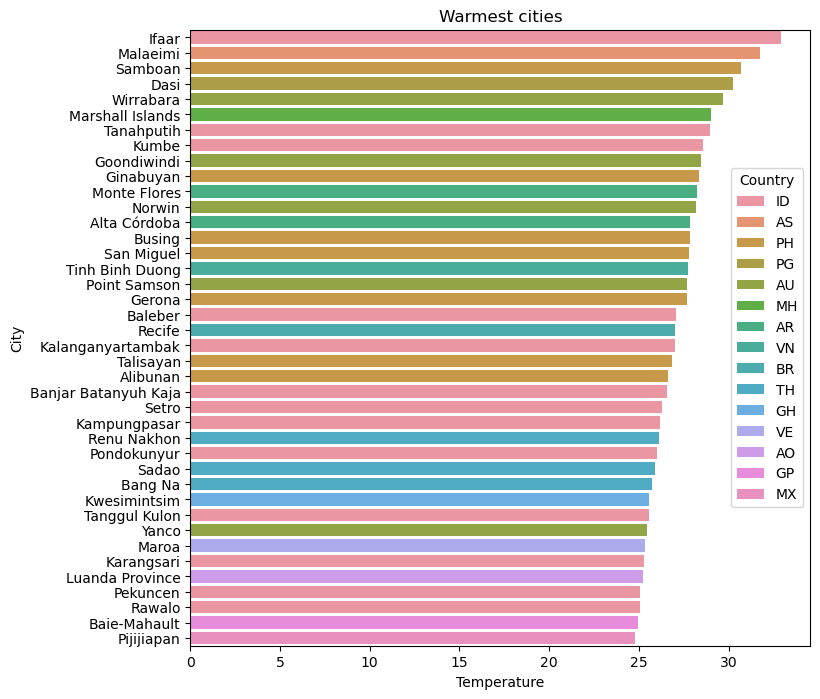

In [239]:
plt.figure(figsize=(8,8))
sns.barplot(data=warmest, x="Temperature", y="Names", hue = 'Country', dodge = False)
plt.title('Warmest cities')
plt.ylabel ('City')
plt.show()

Indonesia, American Samoa, Philippines, Papua New Guinea, Australia, Marshall Islands, Argentina, Vietnam, Brazil, Thailand, Ghana, Venezuela, Angola, Guadeloupe, Mexico. There is wider variety in countries than in coldest ones. Only four of these cities has temperature over 30 degrees.

#### Finding windiest cities

In [270]:
Windiest = cities_weather_df.nlargest(30, 'Windspeed').sort_values('Windspeed', ascending = False)

In [271]:
Windiest

,Names,Temperature,Humidity,Pressure,Weather,Description,Windspeed,Country,Longitude,Latitude
27,Cottlesville,-2.31,80,994,Snow,light snow,19.84,CA,-54.8481,49.4999
84,Mira Loma,19.88,13,1022,Dust,dust,10.29,US,-117.5164,33.9925
66,Whitland,9.79,77,1002,Clouds,broken clouds,8.71,GB,-4.6153,51.8189
317,Warwick,7.67,90,1001,Clouds,overcast clouds,8.70,GB,-1.5833,52.2833
310,Guérande,10.25,72,1013,Clear,clear sky,8.63,FR,-2.4333,47.3333
404,Caherconnell,7.17,76,1001,Clear,clear sky,8.44,IE,-9.1475,53.0411
123,Gârcov,7.38,72,1014,Clouds,overcast clouds,8.27,RO,24.6333,43.7667
196,Stacumny,7.30,83,998,Clouds,few clouds,8.23,IE,-6.5153,53.3361
331,Ridlington,7.43,80,1000,Clouds,overcast clouds,8.23,GB,-0.7560,52.6134
101,Aldringham,8.32,95,1004,Clear,clear sky,8.11,GB,1.5776,52.1932


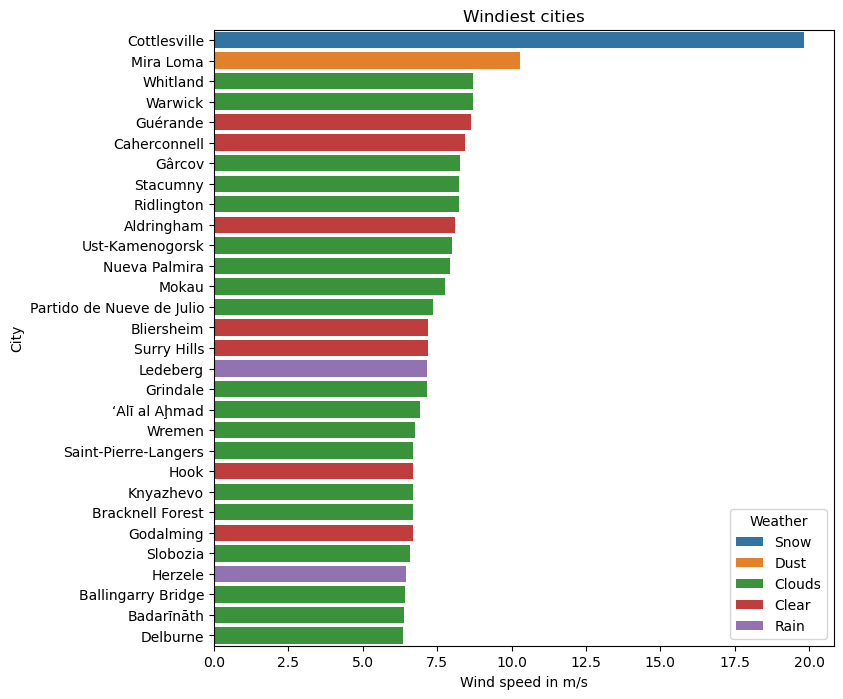

In [277]:
plt.figure(figsize=(8,8))
sns.barplot (data = Windiest, x = 'Windspeed', y= 'Names' , hue = 'Weather', dodge = False)
plt.title('Windiest cities')
plt.xlabel ('Wind speed in m/s')
plt.ylabel ('City')
plt.show()

Windiest city is Cottlesville in Canada with 19.84 m/s. weather is described as snow, which describes why previously there were big jump around central tendenct when weather was compared with wind.

#### Showing cities on map

In [321]:
#using plotly express geo scatter

plot = px.scatter_geo(cities_weather_df, #specifying dataset
                      lat = 'Latitude', lon = 'Longitude', #specifying lon and lat - location
                      color='Weather', #setting color to show weather condition
                      size='Windspeed', #size of the dot is showing windspeed
                      hover_data=['Names', 'Country', 'Temperature', 'Humidity', 'Pressure', 'Description'],
                      #values that are showe when hovering the map
                      title = 'Map of all the cities') #setting map title
plot.show()

Showing all the cities on the map; size of the marker is related to windspeed and colour is gaving info about weather. Hovering over city displays its information.